# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеку pandas заведем таблицу в переменную df
import pandas as pd
df = pd.read_csv('/datasets/data.csv')

In [2]:
#выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
#выведем первые 10 строк датафрейма
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**


<b>1.</b> Дата фрейм состоит из более чем 25 тыс строк и 12 колонок, есть пропуски в столбцах days_employed, total_income, которые нужно обработать.
<br><b>2.</b> В колонке days_employed есть ошибочные значения (например, 340266 дней стажа = 945 лет), но в рамках данного исследования мы не сможем уточнить эти данные. Кроме того, данные этой колонки нам не понадобятся в исследовании.
<br><b>3.</b> В данных days_employed есть отрицательные значения, обработаем их.
<br><b>4.</b> В колонке education обнаружен различный регистр, приведем его к змеиному.
<br><b>5.</b> Значения total_income нужно привести к типу int для более удобного анализа.
<br><b>6.</b> В названиях колонок нарушений стиля нет.
<br><b>7.</b> Возможны ошибки в категорийных переменных children, family_status_id, gender, debt, education_id, нужно проверить.

</div>

## Шаг 2. Предобработка данных

### Обработка пропусков

Как видно в описании датафрейма, в столбцах day_employed и total_income значений меньше, чем в остальных, проверим таблицу на наличие пропусков в этих столбцах. <br>
Для этого вызовем метод isna() к столбцу days_employed и выведем первые 5 строк:

In [4]:
df[df['days_employed'].isna()].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Подсчитаем количество пропущенных значений для стоблцов days_employed и total_income:

In [5]:
print("В столбце days_employed пропущено",len(df[df['days_employed'].isna()]), "значений")
print("В столбце total_income пропущено",len(df[df['total_income'].isna()]), "значений")

В столбце days_employed пропущено 2174 значений
В столбце total_income пропущено 2174 значений


Данные пропуски могли появится как результат сбоя системы сбора информации (т.к. кол-во пропусков одинаковое), либо пользователь не занёс данные сведения умышленно или неумышленно.

Приведем значения колонки day_employed к положительным и заменим пропущенные значения на 'unknown'. В дальнейшем данные этой колонки нам больше не понадобятся.

In [6]:
#перевод значений в положительное
df['days_employed'] = df['days_employed'].abs()

#Заменим пропущенные значения столбца days_employed на 'unknown'.
df['days_employed'] = df['days_employed'].fillna(value='unknown')

#Проверим, заполнились ли пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null object
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


Пропуски столбца day_employed заменили, теперь переходим к обработке пропущенных значений стобца total_income. Эти данные в дальнейшем исследовании нам пригодятся.<br>
Создадим отдельную таблицу total_income_mean, где будет указано медианное значение total_income по каждой категории income_type
<br> Медианное значение используем, чтобы исключить влияние статистических выбросов.

In [7]:
#Проверим, нет ли отрицательных значений в данной колонке:
df['total_income'].min()

20667.26379327158

Найдём медианное значение дохода по каждой категории и выведем эти значения в отдельную таблицу:

In [8]:
#Создадим новую таблицу total_income_mean и найдем по каждому типу income_type медианное значение этой группы
total_income_mean = pd.DataFrame(df.groupby('income_type')['total_income'].median())

#Переименуем название столбца с медианными значениями
total_income_mean = total_income_mean.rename(columns={'total_income':'total_income_mean'})

#Выведем итоговую таблицу
display(total_income_mean)

,total_income_mean
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


In [9]:
#Для замены пропущенных значений вызовем библиотеку numpy
import numpy as np

#заменим нулевые значения на nan
df['total_income'] = df['total_income'].replace(0, np.nan)

#заменим значения Nan медиоаной по 2 параметрам - income_type, family status
df['total_income']= df['total_income'].fillna(df.groupby(['income_type','family_status'])['total_income'].transform('median'))

#оставшиеся значения Nan заменим обратно на 0, такие данные могут появится, если найдутся уникальные сочетания income_type и family_status
df['total_income'] = df['total_income'].replace(np.nan, 0)


Добавим новый столбец со средним значением по доходу к основной таблице и используем его для замены пропущенных значений в колонке total_income:

In [10]:
#Проверим, заполнились ли пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null object
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


**Вывод**


Таким образом, мы заменили пропущенные значения days_employed на unknown, а total_income на медианное по каждой категории income_type.

### Замена типа данных

Для того, чтобы в дальнейшем производить какие-либо математические операции, заменим тип данных в столбце total_income с вещественного на целочисленный через метод astype(), который вызовет ошибку, если какие-то данные некорректны.

In [33]:
df['total_income'] = df['total_income'].astype('int')

Ошибок метод не вывел, проверим, что преобразование типов произошло успешно через info()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null object
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(6), object(6)
memory usage: 2.0+ MB



**Вывод**



На данном этапе мы преобразовали тип данных из вещественного в целочисленный, применив метод astype, позволящий перевести тип значения в нужный.

### Обработка дубликатов

Перейдём к проверке данных в столбце education

In [35]:
#Проверяем столбец education на дубликаты методом unique()
print(df['education'].unique())

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


В данном столбце значения введены с разным регистром, приведем всё к единому стилю методом str.lower()

In [36]:
#применим метод
df['education'] = df['education'].str.lower()

#Проверяем
print(df['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Проанализируем количество явных дубликатов в датафрейме, для этого вызовем метод duplicated() и подсчитаем их количество методом sum():

In [37]:
print('Количество явных дубликатов в датафрейме:', df.duplicated().sum())

Количество явных дубликатов в датафрейме: 71


Для удаления явных дубликатов воспользуемся методом drop_duplicates() и восстановим индексацию после удаления строк через reset_index()

In [38]:
df = df.drop_duplicates().reset_index(drop=True)

Проверим количество явных дубликатов:

In [39]:
print('Количество явных дубликатов в датафрейме:', df.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


Явные дубликаты удалены.<br> Их появление может быть связано со сбоем работы инструмента по сбору информации, когда пользователь заполнил форму дважды.

Теперь проверим датафрейм на наличие неявных дубликатов.
Для этого поочередно вызовем метод unique() к столбцам данных с типом object.

In [40]:
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]


 
В данных столбца children обнаружились значения "-1" и "20". Проверим количество строк с данными значениями.

In [41]:
print(df['children'].value_counts())

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Предположим, что данные значения были введены вручную с ошибкой. Чтобы сделать их корректными, применим к столбцу метод abs() для перевода значения "-1" в "-1", а затем заменим значение "20" на "2" через метод replace().

In [42]:
#Меняем значение -1 на 1
df['children'] = df['children'].abs()

#Меняем значение 20 на 2
df['children'] = df['children'].replace(20, 2)

#Проверяем
print(df['children'].value_counts())

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64


Перейдём к проверке данных в столбце education

In [43]:
#Выведем уникальные значения family_status:
print(df['family_status'].unique())

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


В данном столбце всё приведено к нижнему регистру и нет дубликатов.

In [44]:
#Проверяем данные столбца gender
print(df['gender'].unique())

['F' 'M' 'XNA']


Находим ошибочно указанную категорию, проверяем кол-во строк с данной категорией столбца gender

In [45]:
df['gender'].value_counts()

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

Т.к. остальные данные датафрема не характеризуют значение столбца 'gender' и такая строка одна, то удалим данную строку из датафрейма. Это не окажет сильного влияния на итоговый результат исследования.

In [46]:
df = df.drop(df[df.gender == 'XNA'].index)
#Восстановим порядок индексов после удаления строки
df = df.reset_index()
#Выведем снова уникальные значения столбца gender
print(df['gender'].unique())

['F' 'M']


Теперь, когда осталось только два гендера, переходим к проверке данных столбца purpose.

In [47]:
#выведем уникальные значения столбца
print(df['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Проанализировав список уникальных значений колонки purpose, можно сделать вывод, что некоторые значения списка похожи друг на друга, но нужно привести их к словарной форме, чтобы затем определить наиболее популярные цели, выделить категории и ответить на вопрос, поставленный в исследовании.

**Вывод**


На данном этапе мы обработали явные и неявные дубликаты датафрема, применив такие методы как unique(), value_counts(), drop_duplicates(), replace(), str.lower(). Выполнив различные операции по удалению и замене, мы дошли до столбца с целями кредита и обнаружили, что цели похожи между собой и необходимо выделить основные для дальнейшей категоризации всех данных.

### Лемматизация

Для проведения лемматизации нужно в первую очередь оценить количество уникальных значений.

In [48]:
#Переведем уникальные значения колонки purpose в виде списка
purpose_list = df['purpose'].unique().tolist()

#Выведем результат
print(purpose_list)

['покупка жилья', 'приобретение автомобиля', 'дополнительное образование', 'сыграть свадьбу', 'операции с жильем', 'образование', 'на проведение свадьбы', 'покупка жилья для семьи', 'покупка недвижимости', 'покупка коммерческой недвижимости', 'покупка жилой недвижимости', 'строительство собственной недвижимости', 'недвижимость', 'строительство недвижимости', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'операции с коммерческой недвижимостью', 'строительство жилой недвижимости', 'жилье', 'операции со своей недвижимостью', 'автомобили', 'заняться образованием', 'сделка с подержанным автомобилем', 'получение образования', 'автомобиль', 'свадьба', 'получение дополнительного образования', 'покупка своего жилья', 'операции с недвижимостью', 'получение высшего образования', 'свой автомобиль', 'сделка с автомобилем', 'профильное образование', 'высшее образование', 'покупка жилья для сдачи', 'на покупку автомобиля', 'ремонт жилью', 'заняться высшим образованием']


In [49]:
print("Количество уникальных целей для кредита:",len(purpose_list))

Количество уникальных целей для кредита: 38


На выходе мы получили список из уникальных значений колонки purpose размером в 38 позиций. <br> Теперь попробуем определить, какие цели можно выделить среди уникальных значений, чтобы сделать категоризацию всего датафрема в дальнейшем.

In [50]:
#Импортируем pymystem3
from pymystem3 import Mystem
m = Mystem()

#Импортируем collections
from collections import Counter

#Переведем значения колонки purpose в список purpose_list, чтобы затем пройтись по нему циклом
purpose_list = df['purpose'].unique()

#Лемматизируем каждое значение списка purpose_list и заведем эти значения в список списков purpose_list_lem
purpose_list_lem = []
for i in purpose_list:
    lemmas = m.lemmatize(i)
    purpose_list_lem.append(lemmas)

#Распакуем каждое значение списка списков и пересчитаем их в purpose_count
purpose_count = []
for i in purpose_list_lem:
    for y in i:
        purpose_count.append(y)

#Подсчитаем кол-во лемм
purpose_count_final = Counter(purpose_count)

#Выведем итоговую таблицу с количеством повторений каждой леммы, сортировка по убыванию, первые 15 значений.
purpose_df = pd.DataFrame.from_dict(purpose_count_final, orient='index', columns=['quantity']).sort_values(by='quantity',ascending=False)
display(purpose_df.head(15))

,quantity
,59
\n,38
покупка,10
недвижимость,10
образование,9
автомобиль,9
жилье,7
с,5
свой,4
операция,4



Из таблицы видно, что с самыми частыми повторениями являются следующие леммы: жилье (недвижимость), автомобиль, свадьба, образование.<br> Теперь напишем функцию, которая переведет значения колонки purpose к одной из выделенных нами ранее категорий.


In [51]:
#Функция определит, к какой из 4х категорий относится цель
def purpose_category(purpose):
    i = ' '.join(m.lemmatize(purpose))
    for y in i:
        if "жилье" in i or 'недвижимость' in i:
            return 'недвижимость'
        if "автомобиль" in i:
            return 'автомобиль'
        if "свадьба" in i:
            return 'свадьба'
        if "образование" in i:
            return 'образование'
        else:
            return 0

#Применим функцию к столбцу основного датафрейма
df['purpose_category'] = df['purpose'].apply(purpose_category)

#Проверим результат, выведем первые 10 значений столбцов purpose и purpose_category
print(df[['purpose','purpose_category']].head(10))

                      purpose purpose_category
0               покупка жилья     недвижимость
1     приобретение автомобиля       автомобиль
2               покупка жилья     недвижимость
3  дополнительное образование      образование
4             сыграть свадьбу          свадьба
5               покупка жилья     недвижимость
6           операции с жильем     недвижимость
7                 образование      образование
8       на проведение свадьбы          свадьба
9     покупка жилья для семьи     недвижимость


In [52]:
#Проверим на наличие значений, не попадающих ни под одну категорию
print(df[df['purpose_category'] == 0].head(10))

Empty DataFrame
Columns: [index, children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, purpose_category]
Index: []


**Вывод**


Результатом данного этапа исследования является лемматизация целей кредита, создание нового столбца с выделенными целями кредита, который позволит нам категоризировать данные.

### Категоризация данных

Чтобы ответить на все вопросы, поставленные в данном исследовании, необходимо провести категоризацию данных, которая позволит объединить данные по нужным нам критериям.

В первую очередь категоризируем всех должников по колонке children.

In [53]:
#сгруппируем всех должников по наличию детей в новой таблице
child_debt = pd.DataFrame(df.groupby('children')['debt'].sum()).sort_values('debt',ascending=False)

#найдём общее количество клиентов по каждой категории 
child_category_df = df.pivot_table(index='children', values = 'debt', aggfunc='count')

#переименуем столбец series
child_category_df.columns = ["total"]

#добавим столбец к таблице
child_debt = child_debt.merge(child_category_df, on ='children')

#посчитаем долю должников в каждоый категории колонки children
child_debt['share_cat%'] = child_debt['debt'] / child_debt['total'] * 100


#выведем результат
display(child_debt)

,debt,total,share_cat%
children,,,
0,1063,14090,7.544358
1,445,4855,9.165808
2,202,2128,9.492481
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000


Затем категоризируем всех должников по колонке family_status.

In [54]:
#сгруппируем всех должников по семейному положению в новой таблице
family_debt = pd.DataFrame(df.groupby('family_status')['debt'].sum()).sort_values('debt',ascending=False)

#найдём общее количество клиентов по каждой категории 
family_debt_df = df.pivot_table(index='family_status', values='debt', aggfunc='count')

#переименуем столбец series
family_debt_df.columns = ["total"]

#добавим столбец к таблице
family_debt = family_debt.merge(family_debt_df, on='family_status')

#посчитаем долю должников в каждоый категории колонки family_status
family_debt['share_cat%'] = family_debt['debt'] / family_debt['total'] * 100

#выведем результат
display(family_debt)

,debt,total,share_cat%
family_status,,,
женат / замужем,931,12339,7.545182
гражданский брак,388,4150,9.349398
Не женат / не замужем,274,2810,9.750890
в разводе,85,1195,7.112971
вдовец / вдова,63,959,6.569343


Перейдём к категоризации по уровню дохода.<br> 
Для более корректной установки границ дохода, построим гистограмму, которая наглядно позволит нам увидеть, на какие группы можно разбить уровни дохода.

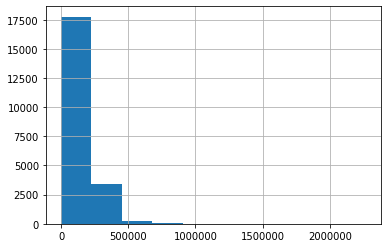

In [55]:
#Строим гистограмму на основе данных total_income
income_hist = df['total_income'].hist()
fig = income_hist.get_figure()

По данным гистограммы можно сделать вывод, что возможна группировка всех доходов на 3 группы: до 250 тыс., от 250 до 500 тыс., более 500 тыс.

In [56]:
#Напишем функцию, которая определяет категорию для уровня дохода
pd.options.mode.chained_assignment = None
income_debt = df[['debt', 'total_income']]

def income_category(income):
    if income <= 107000:
        return 'low'
    if income > 107000 and income < 145000:
        return 'middle'
    if income > 145000 and income < 205000:
        return 'middle+'
    return 'high'


#Применим функцию к датафрейму
income_debt['category'] = income_debt['total_income'].apply(income_category)

#Импортируем numpy, чтобы заменить нулевые значения в столбце debt на Nan, это даст нам возможность подсчитать кол-во строк
import numpy as np
income_debt['debt'] = income_debt['debt'].replace(0, np.nan)

#сделаем пивот с числом должников по каждой категории и числом клиентов по каждой категории
income_debt_pivot = income_debt.pivot_table(index='category', aggfunc='count')

#Переименуем столбцы пивота
income_debt_pivot.columns = ['debt', 'total']

#найдём долю должников в общем числе клиентов для каждоый категории
income_debt_pivot["share_cat%"] = income_debt_pivot['debt'] / income_debt_pivot['total'] * 100


#выведем результат
print(income_debt_pivot)


          debt  total  share_cat%
category                         
high       330   4734    6.970849
low        423   5308    7.969103
middle     515   5827    8.838167
middle+    473   5584    8.470630


Сгруппируем всех должников по целям кредита. Для этого используем уже сформированные данные в колонке purpose_category.

In [66]:
#Сгруппируем получившиеся значения
goal_debt = pd.DataFrame(df.groupby('purpose_category')['debt'].sum()).sort_values('debt',ascending=False)

#посчитаем кол-во клиентов по каждой категории purpose
goal_debt_pivot = df.pivot_table(index='purpose_category', values='debt', aggfunc='count')

#переименуем столбец series
goal_debt_pivot.columns = ['total']

#добавим столбец к итоговой таблице
goal_debt = goal_debt.merge(goal_debt_pivot, on='purpose_category')

#найдём долю должников в каждой категории Purpose
goal_debt["share_cat%"] = goal_debt['debt'] / goal_debt['total'] * 100

#выведем результат
display(goal_debt)

,debt,total,share_cat%
purpose_category,,,
недвижимость,782,10810,7.234043
автомобиль,403,4306,9.359034
образование,370,4013,9.220035
свадьба,186,2324,8.003442


**Вывод**

На данном этапе мы подготовили датафреймы, которые позволят нам ответить на вопросы, поставленные в данном исследовании. Категоризация данных была основана на данных из обработанного датафрейма.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [58]:
#приведем подготовленную таблицу
display(child_debt)

,debt,total,share_cat%
children,,,
0,1063,14090,7.544358
1,445,4855,9.165808
2,202,2128,9.492481
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000


**Вывод**


Как видно из таблицы, чаще всего не возвращают кредиты клиенты с 4, 2, 1 ребенком. Но т.к. группы в генеральной совокупности распределены неравномерно (группа без детей составляет порядка 66% от все совокупности), то трудно сделать определенные выводы относительно зависимости наличия детей и возврата по кредиту.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [59]:
#приведем подготовленную таблицу
display(family_debt)

,debt,total,share_cat%
family_status,,,
женат / замужем,931,12339,7.545182
гражданский брак,388,4150,9.349398
Не женат / не замужем,274,2810,9.750890
в разводе,85,1195,7.112971
вдовец / вдова,63,959,6.569343


**Вывод**


Наибольший процент просрочек по кредиту наблюдается в категориях "гражданский брак" и "не женат/не замужем". Группа "женат/замужем" непропорционально большая, и возможно её следует разделить на более равномерные категории. Исходя из полученных данных можно сделать предварительный вывод, что люди не состоящие в отношениях меньше склонны к просрочкам по кредиту (в разводе - 7.1%, вдовец/вдова - 6.5%), чем те, кто состоит в отношениях (женат/замужем - 7.5%, гражданский брак - 9.3%). 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [60]:
#приведем подготовленную таблицу
display(income_debt_pivot)

,debt,total,share_cat%
category,,,
high,330,4734,6.970849
low,423,5308,7.969103
middle,515,5827,8.838167
middle+,473,5584,8.470630


**Вывод**

Категории для данного датафрейма выбраны произвольно, поэтому здесь сложно выделить какую-либо зависимость между уровнем дохода клиента и процентом невозврата кредита. Клиенты с высоким уровнем заработка наименее склонны к просрочкам по кредиту, это подтверждает таблица и здравый смысл. Что касается наиболее частых должников, то при условии произвольной разбивки выделяются категории middle (8.8% невозврата) и middle+ (8.4% невозврата). 

- Как разные цели кредита влияют на его возврат в срок?

In [61]:
display(goal_debt)

,debt,total,share_cat%
purpose_category,,,
недвижимость,782,10810,7.234043
автомобиль,403,4306,9.359034
образование,370,4013,9.220035
свадьба,186,2324,8.003442


**Вывод**


В категориях "автомобиль" и "образование" находится наибольшее кол-во должников по отношению к соответствующей категории кредита. Возможно, это связано с большим процентом по возврату (потребительский кредит). Наименее вероятны просрочки по категории "недвижимость". Процент по ипотеке традиционно ниже потребительского.

## Шаг 4. Общий вывод

 В данном исследовании мы рассмотрели в различных разрезах должников банка и сформировали образ клиента, который вероятнее всего не вернёт кредит в срок: это клиенты, которые берут кредиты по категории "автомобиль" (9.25% невозврата), имеют 4 (9.75%) или 2 ребенка (9.49%). По уровням дохода сложно сделать какой-либо определенный вывод, т.к. границы уровней дохода выбраны произвольно, данная категория требует дополнительной проработки. Можно предположить, по данным исследования, что наибольшим процентом невозврата обладают категории middle и middle+.<br> Стоит рассмотреть выдачу кредита более внимательно для клиентов, обладающими перечисленными выше характеристиками.<br><br> С большей вероятностью клиент вернет кредит в срок, если он берёт в долг по категории "недвижимость" (7.23%), имеет высокий уровень дохода (6.9%, требует проработки), вдовец/вдова (6.5%) и не имеет детей (7.5%).